# Optical recognition handwrite of data set

In [35]:
# Required Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

# Data Set Information:

We used preprocessing programs made available by NIST to extract normalized bitmaps of handwritten digits from a preprinted form. From a total of 43 people, 30 contributed to the training set and different 13 to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16. This reduces dimensionality and gives invariance to small distortions.
Dataset is loaded from UCL Machin learning Repository. "https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits"

In [36]:
# load data
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra", header=None)

In [37]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


# Rename Column

In [38]:
df.columns = ["P" + str(i) for i in range(0,len(df.columns)-1)] + ["y"]

In [39]:
df.columns

Index(['P0', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
       'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'P38', 'P39', 'P40',
       'P41', 'P42', 'P43', 'P44', 'P45', 'P46', 'P47', 'P48', 'P49', 'P50',
       'P51', 'P52', 'P53', 'P54', 'P55', 'P56', 'P57', 'P58', 'P59', 'P60',
       'P61', 'P62', 'P63', 'y'],
      dtype='object')

In [40]:
df.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P55,P56,P57,P58,P59,P60,P61,P62,P63,y
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


# Select Case

select cases for the digit {1,3,6,9}

In [41]:
df = df.loc[df.y.isin([1, 2, 4, 6, 8])]

df.head(15)

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P55,P56,P57,P58,P59,P60,P61,P62,P63,y
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
5,0,0,11,16,10,1,0,0,0,4,...,3,0,0,10,16,16,16,16,6,2
9,0,0,3,13,13,2,0,0,0,6,...,0,0,0,3,15,11,6,0,0,8
11,0,0,0,3,16,11,1,0,0,0,...,0,0,0,0,2,14,14,1,0,1
16,0,0,0,1,11,7,0,0,0,0,...,0,0,0,0,3,15,0,0,0,4
18,0,0,1,8,13,13,2,0,0,4,...,0,0,0,1,13,12,4,0,0,8
19,0,0,0,2,13,12,4,0,0,0,...,0,0,0,0,0,15,3,0,0,4
21,0,0,4,10,13,11,1,0,0,2,...,0,0,0,6,13,11,1,0,0,8
24,0,0,9,13,1,0,0,0,0,0,...,5,0,0,4,15,16,16,16,16,1


# Spllitting Data

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df.filter(regex="\d"), df.y, test_size=0.3, random_state=1)

In [43]:
# make the train and test data set
trn = X_train
trn["y"] = y_train

tst = X_test
tst["y"] = y_test


# save data

In [44]:
df.to_csv("optdigits.csv", sep = ",", index = False)
trn.to_csv("optdigits.trn.csv", sep = ",", index = False)
tst.to_csv("optdigits.tst.csv", sep = ",", index = False)


In [45]:
X_trn = trn.filter(regex="\d")
y_trn = trn.y

X_tst = tst.filter(regex="\d")
y_tst = tst.y

# Principal Component Analysis (PCA)

In [46]:
from sklearn.decomposition import PCA

## Train Model

Text(0, 0.5, 'Variance ratio')

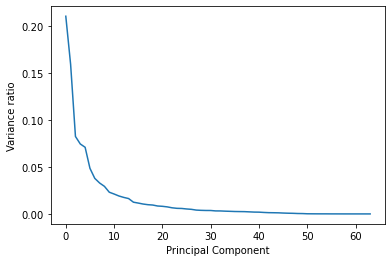

In [47]:
#set up thr pca object
pca = PCA()

#transformng the training data
trn_tf = pca.fit_transform(X_trn)

# Plot the variance explained by each component
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Variance ratio")

<AxesSubplot:>

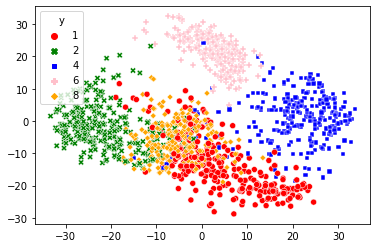

In [48]:
# Plots the projected data set on the first two principal components and colors by class
sns.scatterplot(
    x=trn_tf[:, 0], 
    y=trn_tf[:, 1],
    style=y_trn,
    hue=y_trn,
    palette=['red', 'green', 'blue',"pink","orange"])

In [49]:
# Gets the average log likelihood score of training data (with two decimal places)
print("%.2f" % pca.score(X_trn))

-47.46


## Test Model

<AxesSubplot:>

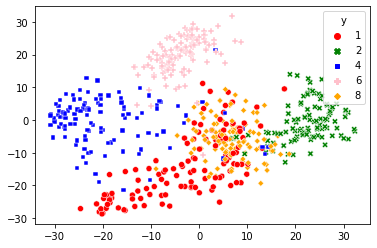

In [50]:
#transformng the testing data
tst_tf = pca.fit_transform(X_tst)

# Plots the projected data set on the first two principal components and colors by class
sns.scatterplot(
    x=tst_tf[:, 0], 
    y=tst_tf[:, 1],
    style=y_tst,
    hue=y_tst,
    palette=['red', 'green', 'blue',"pink","orange"])

In [51]:
# Gets the average log likelihood score of testing data (with two decimal places)
print("%.2f" % pca.score(X_tst))

47.00


# Linear Discriminant Analysis (LDA)

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Training Model

In [53]:
# set up the Linear Discriminant Analysis Object
lda = LinearDiscriminantAnalysis()

In [54]:
# filt on traing data
lda.fit = lda.fit(X_trn,y_trn)

In [55]:
# Transforming the data
trn.tf = lda.transform(X_trn)

<ipython-input-55-eae50b5fed92>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  trn.tf = lda.transform(X_trn)


<AxesSubplot:>

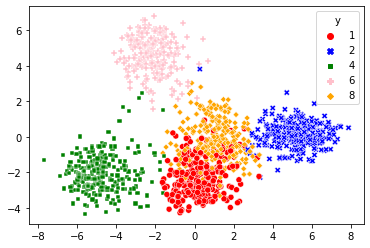

In [56]:
# Plot of first two discriminant function
sns.scatterplot(x = trn.tf[:,0],
               y = trn.tf[:,1],
               style=y_trn,
               hue = y_trn,
               palette=["red","blue","green","pink","orange"])

In [57]:
# Accuracy of lda model on training data
lda.score(X_trn,y_trn)
print("Accuracy of lda on training data = " + str("{: 2%})".format(lda.score(X_trn,y_trn))))

Accuracy of lda on training data =  98.132935%)


## Testing model

In [58]:
# Transforming the train model on test data
tst.tf = lda.transform(X_tst)

<ipython-input-58-4de2ca0fa107>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  tst.tf = lda.transform(X_tst)


<AxesSubplot:>

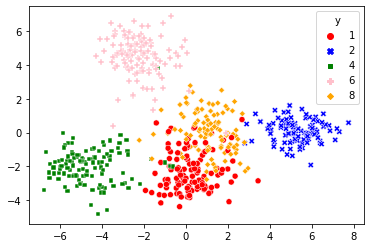

In [59]:
# plot the first two discriminant analysis function on test data
sns.scatterplot(x = tst.tf[: ,0],
                y =tst.tf[: ,1],
                style=y_tst,
                hue = y_tst,
                palette= ["red","blue","green","pink","orange"])

In [60]:
# Accuracy of lda on test data set
print("Accuracy of LDA model on testing data :" + str("{:2%}".format(lda.score(X_tst,y_tst))))

Accuracy of LDA model on testing data :96.515679%


# t-SNE: t-DISTRIBUTED STOCHASTIC NEIGHBOR EMBEDDING

t-SNE is a statistical method for visualizing the high dimentional data set. 

In [61]:
from sklearn.manifold import TSNE # for t-SNE method

In [62]:
# Sets up the t-SNE object with 2 components
tsne = TSNE(
    n_components=2,
    random_state=1)

## perplexity=1

<AxesSubplot:>

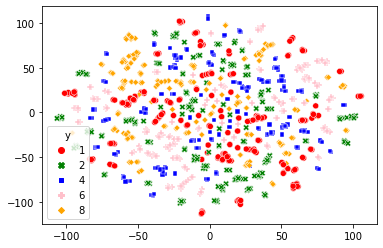

In [63]:
# Sets up t-SNE with perplexity = 1
tsne = TSNE(
    n_components=2,
    perplexity=1,
    random_state=1)

# Transforms the attribute data
trn_tf = tsne.fit_transform(X_trn)

# Creates a scatterplot of the data embedding
sns.scatterplot(
    x=trn_tf[:, 0],
    y=trn_tf[:, 1],
    style=y_trn,
    hue=y_trn,
    palette=['red', 'green', 'blue',"pink","orange"])

## perplexity=5

<AxesSubplot:>

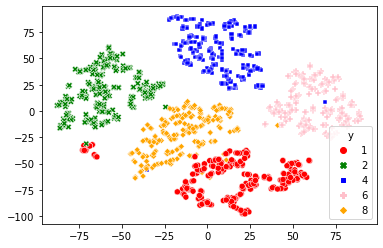

In [64]:
# Sets up t-SNE with perplexity = 5
tsne = TSNE(
    n_components=2,
    perplexity=5,
    random_state=1)

# Transforms the attribute data
trn_tf = tsne.fit_transform(X_trn)

# Creates a scatterplot of the data embedding
sns.scatterplot(
    x=trn_tf[:, 0],
    y=trn_tf[:, 1],
    style=y_trn,
    hue=y_trn,
    palette=['red', 'green', 'blue',"pink","orange"])

## perplexity=10

<AxesSubplot:>

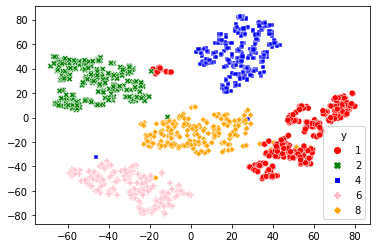

In [65]:
# Sets up t-SNE with perplexity = 10
tsne = TSNE(
    n_components=2,
    perplexity=10,
    random_state=1)

# Transforms the attribute data
trn_tf = tsne.fit_transform(X_trn)

# Creates a scatterplot of the data embedding
sns.scatterplot(
    x=trn_tf[:, 0],
    y=trn_tf[:, 1],
    style=y_trn,
    hue=y_trn,
    palette=['red', 'green', 'blue',"pink","orange"])

## perplexity=15

<AxesSubplot:>

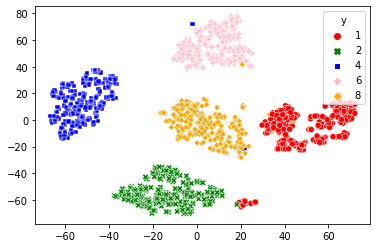

In [66]:
# Sets up t-SNE with perplexity = 15
tsne = TSNE(
    n_components=2,
    perplexity=15,
    random_state=1)

# Transforms the attribute data
trn_tf = tsne.fit_transform(X_trn)

# Creates a scatterplot of the data embedding
sns.scatterplot(
    x=trn_tf[:, 0],
    y=trn_tf[:, 1],
    style=y_trn,
    hue=y_trn,
    palette=['red', 'green', 'blue',"pink","orange"])

<AxesSubplot:>

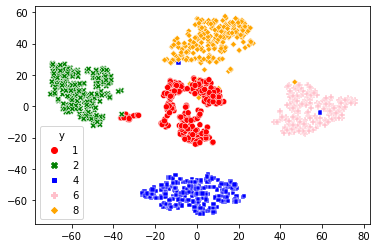

In [67]:
# Sets up t-SNE with perplexity = 20
tsne = TSNE(
    n_components=2,
    perplexity=20,
    random_state=1)

# Transforms the attribute data
trn_tf = tsne.fit_transform(X_trn)

# Creates a scatterplot of the data embedding
sns.scatterplot(
    x=trn_tf[:, 0],
    y=trn_tf[:, 1],
    style=y_trn,
    hue=y_trn,
    palette=['red', 'green', 'blue',"pink","orange"])

<AxesSubplot:>

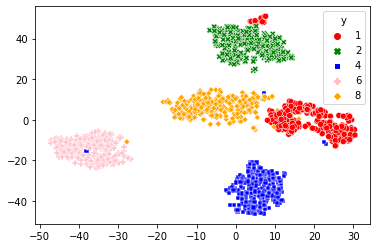

In [68]:
# Sets up t-SNE with perplexity = 50
tsne = TSNE(
    n_components=2,
    perplexity=50,
    random_state=1)

# Transforms the attribute data
trn_tf = tsne.fit_transform(X_trn)

# Creates a scatterplot of the data embedding
sns.scatterplot(
    x=trn_tf[:, 0],
    y=trn_tf[:, 1],
    style=y_trn,
    hue=y_trn,
    palette=['red', 'green', 'blue',"pink","orange"])